<a href="https://colab.research.google.com/github/ykitaguchi77/GravCont_classification_colab/blob/master/Human_prediction_all_%E9%85%8D%E5%B8%83%E7%94%A8_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Human_prediction (配布用）**

#使用方法：<br>

評価マニュアル>>>https://drive.google.com/file/d/1B-LtyqcP2rarJOfbNuLTreiRX0QenbC-/view?usp=sharing

1. Open in Colabのタブをクリックしてgoogle colabを起動します。
2. カラム左側のボタンをクリックしてプログラムをスタートします<br><br>
3. 'Go to this URL in a browser'のリンクをクリック<br>
→アカウントの選択→別のアカウントを使用<br>
          メールアドレスまたは電話番号：gravcont
          パスワード：ted_77777
4. 名前を選択すると写真が表示されます。評価を開始して下さい。<br>
    　　※cont：コントロール、grav：甲状腺眼症<br><br>
5. 「2:評価を中断する」を選択すると、途中経過がセーブされます。プログラムを再起動すると途中から評価が再開できます。


Mounted at /content/drive
0: inoue
1: kohzaki
2: morimoto
3: kitaguchi
4: kawasaki
5: 終了する

確認：あなたの名前はkitaguchiですか？


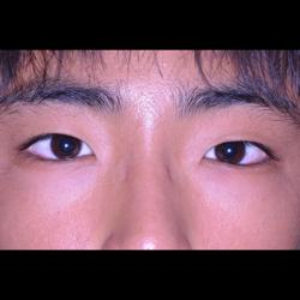

Image_ID：225
cont：「0」
grav：「1」
評価を中断する: 「2」
contを判定に追加します


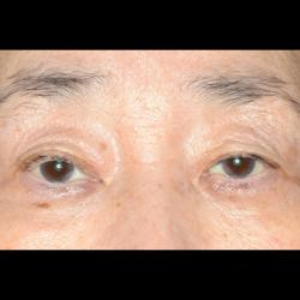

Image_ID：1029
cont：「0」
grav：「1」
評価を中断する: 「2」
ﾌﾟﾛｸﾞﾗﾑを中断します。有難うございました。

残り枚数は523枚です。お疲れ様でした！
判定結果の入力間違いがあれば、Image_IDと正しい判定を記載して下さい


(221, b'2.0.0 closing connection p139sm2779995vke.8 - gsmtp')

In [1]:
import os
import pandas as pd
import glob
import os.path as osp
import random
from PIL import Image
import sys
import datetime

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

#Google colabをマウント
from google.colab import drive
drive.mount('/content/drive')


#モジュール群
def selectName():
    evaluator_list = df.columns.values[2:]

    k=0
    for i in evaluator_list:
        print(str(k)+": "+ i)
        k+= 1
    print(str(k)+": 終了する")
    evaluator = input('名前を選んで下さい')

    if int(evaluator) == k:
        print('ﾌﾟﾛｸﾞﾗﾑを終了します。有難うございました。')
        sys.exit()
    elif int(evaluator) > k:
        raise Exception("表示されている番号を選んで下さい")
        sys.exit()
    elif str.isdigit(evaluator) == False:
        raise Exception("数字を入力して下さい")
    
    return(evaluator)

def confirmName(evaluator, evaluator_list):
    print('\n確認：あなたの名前は'+str(evaluator_list[int(evaluator)+2])+'ですか？')
    confirmName = input('0:はい   1:いいえ   2:中止')
    if confirmName == '0':
        pass
    elif confirmName == '1':
        print('')
        print('')
    elif confirmName == '2':
        print('ﾌﾟﾛｸﾞﾗﾑを終了します。有難うございました')
    return(confirmName)

def getlabel(image_path):
    image_name = int(os.path.basename(image_path).split(".")[0])  #パスから画像番号を抜き出し
    label = os.path.basename(os.path.dirname(image_path))  #パスからラベルのフォルダ名を抜き出し
    return(image_name, label)


def showImage(image_path):
    #画像のインポート
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    #画像のリサイズ
    height = img.shape[0]
    width = img.shape[1]
    resized_img = cv2.resize(img, (int(width*300/height), 300))
    cv2_imshow(resized_img)

def hum_prediction():
    while True:
        print(class_name[1]+'：「0」')
        print(class_name[0]+'：「1」')
        print('評価を中断する: 「2」')
        pred = input('ラベルを入力して下さい')
        if pred == '1':
            hum_pred = class_name[0]
            break
        elif pred == '0':
            hum_pred = class_name[1]
            break
        elif pred == '2':
            hum_pred = 'exit'
            break
        else:
            print('0-2を入力して下さい')
    return hum_pred 

def loadImages():
    image_path = glob.glob("/content/drive/My Drive/gravcont_seed_1234/*/*/*")
    #random.shuffle(image_path)  #表示順をランダムにする
    #print(len(image_path))
    #print(image_path) 

    #ファイル名よりラベルを抜き出し、'class_name'と定義
    class_name = []
    class_path = glob.glob('/content/drive/My Drive/gravcont_seed_1234/val/*')
    for i in class_path:
        class_name.append(os.path.basename(i))  
    return(image_path, class_name)

#ここからメインプログラム

#CSVファイルを開く
df = pd.read_csv('/content/drive/My Drive/Hum_eval.csv', index_col=0, header=0)

#イメージをロードする
image_path, class_name = loadImages() 
image_name_list = []
label_list = []
evaluator_list = df.columns.values

for i in image_path:
    image_name, label = getlabel(i)  #画像の名前とラベルを取得
    image_name_list.append(image_name) #image_nameを番号でリストに格納
    label_list.append(label)

while True:
    evaluator = selectName() #名前を選択
    confirm = confirmName(evaluator, evaluator_list) #名前を確認
    if confirm == '0':
        break
    elif confirm =='2':
        sys.exit()

#人による判定
random.shuffle(image_path)

#Alert
alert = [5,10,30,50,100]

for i in image_path:   
    #print(i) #画像のパスを表示

    #row = df[df['image_name'] == getlabel(i)[0]] #画像のIDと同じ行を抜き出す
    row = df[df['image_name'] == getlabel(i)[0]] #画像のIDと同じ行を抜き出す
    #print(row)  #画像に一致したCSVの行を表示
    #print(row.iloc[0,int(evaluator)+2])  

    remain_num = df.iloc[:,int(evaluator)+2].isnull().sum() #まだ評価していない画像をカウント
    #print(remain_num)

    if remain_num in alert:
        print('あと'+str(remain_num)+'枚です！\n') 

    if  remain_num == 0: #全画像評価済の場合は終了する　
        print('全画像を判定済みです。有難うございました。')
        break
    elif isinstance(row.iloc[0,int(evaluator)+2], float) == True:  #すでに評価したものはスキップする
        showImage(i) #画像を表示
        print('Image_ID：'+str(row.iloc[0,0]))
        hum_pred = hum_prediction() #ヒトに判定してもらう
        
        if hum_pred == 'exit':
            print('ﾌﾟﾛｸﾞﾗﾑを中断します。有難うございました。')
            break
        else:
            print(hum_pred+'を判定に追加します')
            df.iloc[row.index, int(evaluator)+2] = hum_pred #判定結果を表に追加する
            
remain_num = df.iloc[:,int(evaluator)+2].isnull().sum() #まだ評価していない画像をカウント
print('\n残り枚数は'+str(remain_num)+'枚です。お疲れ様でした！') 

#CSV形式で保存
day = datetime.date.today()
csv_path = '/content/drive/My Drive/Hum_eval.csv'
csv = df.to_csv('/content/drive/My Drive/Hum_eval.csv')



#メールで結果を送信

print('判定結果の入力間違いがあれば、Image_IDと正しい判定を記載して下さい')
massage = input()

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email.utils import COMMASPACE
from email import encoders
import datetime

SUBJECT = 'GravCont Result'
FILENAME = 'Hum_eval.csv'
FILEPATH = csv_path
MY_EMAIL = 'gravcont@gmail.com'
MY_PASSWORD = 'yucizzfxcyelklsm'
TO_EMAIL = 'kitaguchi@yk-gankeisei.com'
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 587
body = str(datetime.datetime.now())+'\n'+massage  #日付と連絡事項

msg = MIMEMultipart()
msg['From'] = MY_EMAIL
msg['To'] = COMMASPACE.join([TO_EMAIL])
msg['Subject'] = SUBJECT

part = MIMEBase('application', "octet-stream")
part.set_payload(open(FILEPATH, "rb").read())
encoders.encode_base64(part)
part.add_header('Content-Disposition', 'attachment', filename=FILENAME)  # or
# part.add_header('Content-Disposition', 'attachment; filename="attachthisfile.csv"')
msg.attach(part)

body = MIMEText(body)
msg.attach(body)

smtpObj = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
smtpObj.ehlo()
smtpObj.starttls()
smtpObj.login(MY_EMAIL, MY_PASSWORD)
smtpObj.sendmail(MY_EMAIL, TO_EMAIL, msg.as_string())
smtpObj.quit()
print("バックアップのメールを送信しました")